In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [6]:
df=pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/telecom_churn.csv')

# Checking the data

In [4]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Split Dependent and Independent

In [7]:
X=df.drop(['churn'],axis=1)
Y=df[['churn']]

In [70]:
Y.mean()

churn    0.144914
dtype: float64

# Missing Value Check

In [8]:
X.isnull().sum()/X.count()

state                     0.0
account length            0.0
area code                 0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
dtype: float64

In [12]:
correlation=X.corr()

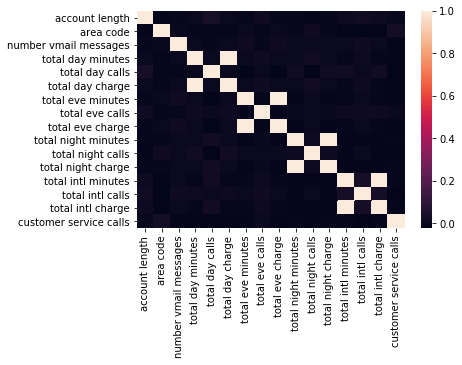

In [13]:
import seaborn as sns
ax=sns.heatmap(correlation)

In [14]:
X=df.drop(['total day charge','total eve charge','total intl charge','total night charge'],axis=1)

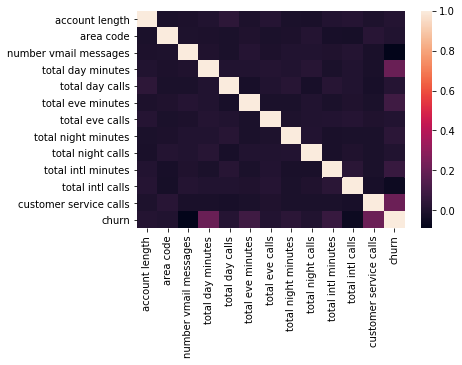

In [15]:
correlation_1=X.corr()
ax=sns.heatmap(correlation_1)

# Encoding categorical features

In [55]:
char_features=['state','international plan','voice mail plan']

In [56]:
X_char=pd.get_dummies(X[char_features],drop_first=True)

In [57]:
X_num=df.drop(['state','international plan','voice mail plan'],axis=1)

In [127]:
X_all=pd.concat([X_num,X_char],axis=1,join="inner")

In [128]:
X_all=X_all.drop(['churn'],axis=1)

In [129]:
X_all.dtypes

account length              int64
area code                   int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
state_AL                    uint8
state_AR                    uint8
state_AZ                    uint8
state_CA                    uint8
state_CO                    uint8
state_CT                    uint8
state_DC                    uint8
state_DE                    uint8
state_FL                    uint8
state_GA                    uint8
state_HI                    uint8
state_IA                    uint8
state_ID                    uint8
state_IL      

# Capping and Flooring of Outliers if Present

In [130]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [131]:
X_all=X_all.apply(lambda x: outlier_capping(x))
X_all.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.981362,437.182418,8.074707,179.792499,100.482748,30.565254,201.000852,100.129913,17.085312,200.791174,...,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.096910,0.276628
std,39.276205,42.371290,13.622222,53.535083,19.628346,9.100850,49.821440,19.546408,4.234920,49.519955,...,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.295879,0.447398
min,12.320000,408.000000,0.000000,51.832000,54.000000,8.813200,79.524000,53.000000,6.759200,79.428000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,195.000000,510.000000,43.000000,305.168000,146.000000,51.876800,318.936000,147.000000,27.113600,317.448000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
X.shape

(3333, 71)

# Feature Scaling 

In [62]:
#Import the Class
from sklearn.preprocessing import StandardScaler 
#Build an Object
stdsc=StandardScaler() 
#Apply Method on the Object
X_std=pd.DataFrame(stdsc.fit_transform(X_all),index=X_all.index,columns=X_all.columns).add_suffix('_std')

In [30]:
type(X_std)

pandas.core.frame.DataFrame

In [98]:
X_std.head()

,account length_std,area code_std,number vmail messages_std,total day minutes_std,total day calls_std,total day charge_std,total eve minutes_std,total eve calls_std,total eve charge_std,total night minutes_std,...,state_TX_std,state_UT_std,state_VA_std,state_VT_std,state_WA_std,state_WI_std,state_WV_std,state_WY_std,international plan_yes_std,voice mail plan_yes_std
0,0.688017,-0.523603,1.242663,1.593727,0.484946,1.594018,-0.072286,-0.057815,-0.072105,0.886823,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,1.617086
1,0.153262,-0.523603,1.316083,-0.339875,1.147352,-0.340157,-0.110428,0.146857,-0.109892,1.082733,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,1.617086
2,0.917198,-0.523603,-0.592849,1.188324,0.688763,1.188501,-1.601978,0.505032,-1.602470,-0.771344,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,-0.618396
3,-0.432422,-0.688834,-0.592849,2.234524,-1.502275,2.234714,-2.438610,-0.620663,-2.438691,-0.078590,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,3.052685,-0.618396
4,-0.661603,-0.523603,-0.592849,-0.244596,0.637809,-0.244547,-1.057953,1.119048,-1.056923,-0.280559,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,3.052685,-0.618396


In [132]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=50)
selector.fit_transform(X_all, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features = X_all.iloc[:,cols]

# Train Test Split

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(select_features,Y, test_size=0.3,random_state=42)

# Check for randomness of train and test by testing the event rates across the two datasets

In [34]:
y_train.mean()

churn    0.145735
dtype: float64

In [35]:
y_test.mean()

churn    0.143
dtype: float64

In [101]:
X_test.dtypes

account length            float64
area code                 float64
number vmail messages     float64
total day minutes         float64
total day calls           float64
total day charge          float64
total eve minutes         float64
total eve calls           float64
total eve charge          float64
total night minutes       float64
total night calls         float64
total night charge        float64
total intl minutes        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
state_AL                  float64
state_AR                  float64
state_AZ                  float64
state_CA                  float64
state_CT                  float64
state_DC                  float64
state_FL                  float64
state_HI                  float64
state_IA                  float64
state_ID                  float64
state_IL                  float64
state_IN                  float64
state_KS                  float64
state_LA      

In [ ]:
# Building the Naive Bayes Model

In [134]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)

C:\Anaconda_Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

# Making Class Predictions

In [135]:
y_pred=clf.predict(X_test)

# Model Evaluation

In [136]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.662
Precision 0.25925925925925924
Recall 0.7342657342657343
f1_score 0.3832116788321168


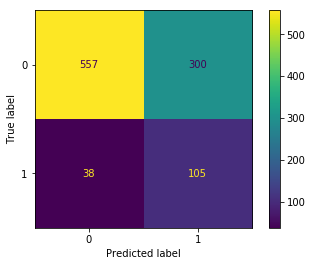

In [137]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

In [138]:
metrics.roc_auc_score(y_test,y_pred)

0.692103695604279

# Visualizing the Model Performance - Lorenz Curve

In [94]:
y_pred_prob = clf.predict_proba(X_all)

In [95]:
y_pred_prob

array([[1.50793852e-03, 9.98492061e-01],
       [9.84395352e-01, 1.56046477e-02],
       [4.04885339e-07, 9.99999595e-01],
       ...,
       [9.99999993e-01, 7.24932229e-09],
       [1.60763151e-02, 9.83923685e-01],
       [9.98908210e-01, 1.09178964e-03]])

In [139]:
y_pred_prob = clf.predict_proba(select_features)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_nb']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank_nb')['churn'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_nb',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_nb,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,334,0.377246,126.0,126.0,0.260870,0.260870,0.10021,0.10021,1,2.603228
1,9,333,0.213213,71.0,197.0,0.146998,0.407867,0.09991,0.20012,2,2.038114
2,8,333,0.192192,64.0,261.0,0.132505,0.540373,0.09991,0.30003,3,1.801062
3,7,333,0.273273,91.0,352.0,0.188406,0.728778,0.09991,0.39994,4,1.822220
4,6,333,0.048048,16.0,368.0,0.033126,0.761905,0.09991,0.49985,5,1.524267
5,5,334,0.038922,13.0,381.0,0.026915,0.788820,0.10021,0.60006,6,1.314568
6,4,333,0.093093,31.0,412.0,0.064182,0.853002,0.09991,0.69997,7,1.218627
7,3,333,0.072072,24.0,436.0,0.049689,0.902692,0.09991,0.79988,8,1.128534
8,2,333,0.075075,25.0,461.0,0.051760,0.954451,0.09991,0.89979,9,1.060749
9,1,334,0.065868,22.0,483.0,0.045549,1.000000,0.10021,1.00000,10,1.000000


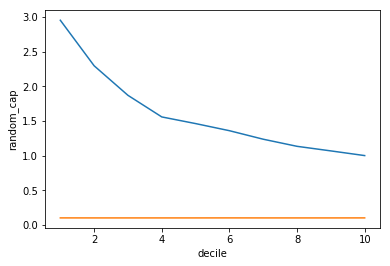

In [116]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

In [ ]:
# Create a feature that shows how much money telecom is making
# Divide that into "High Value Customer" and "Low Value Customer" Groups
# Create Tenure deciles
# Divide into "High Tenure" and "Low Tenure" groups
# Slice the data with respect to Top 4 Probability Deciles and Bottom 6
# Make a Cross tab to show how many customers between Tenure and Value Buckets are getting captures

In [140]:
X_all.dtypes

account length            float64
area code                 float64
number vmail messages     float64
total day minutes         float64
total day calls           float64
total day charge          float64
total eve minutes         float64
total eve calls           float64
total eve charge          float64
total night minutes       float64
total night calls         float64
total night charge        float64
total intl minutes        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
state_AL                  float64
state_AR                  float64
state_AZ                  float64
state_CA                  float64
state_CO                  float64
state_CT                  float64
state_DC                  float64
state_DE                  float64
state_FL                  float64
state_GA                  float64
state_HI                  float64
state_IA                  float64
state_ID                  float64
state_IL      

In [141]:
df['Tenure_Rank']=pd.qcut(df['account length'].rank(method='first').values,10,duplicates='drop').codes+1

In [144]:
df.groupby('Tenure_Rank')['account length'].agg(['min','max','mean'])

,min,max,mean
Tenure_Rank,,,
1,1,50,32.125749
2,50,67,59.411411
3,67,80,73.639640
4,80,91,85.507508
5,91,101,95.619760
6,101,111,105.666667
7,111,122,116.393393
8,122,134,127.447447
9,134,152,142.492492


In [145]:
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=3,"Low Tenure","High Tenure")

In [156]:
df.groupby('Tenure_Segment')['account length'].agg(['min','max','mean'])

,min,max,mean
Tenure_Segment,,,
High Tenure,80,243,120.794256
Low Tenure,1,80,55.036000


In [146]:
df['Total_charges']=df['total day charge']+df['total eve charge']+df['total night charge']+df['total intl charge']

In [147]:
df['Charges_Rank']=pd.qcut(df['Total_charges'].rank(method='first').values,10,duplicates='drop').codes+1

In [149]:
df.groupby('Charges_Rank')['churn'].agg(['min','max','mean'])

,min,max,mean
Charges_Rank,,,
1,0,1,0.110778
2,0,1,0.129129
3,0,1,0.147147
4,0,1,0.147147
5,0,1,0.044910
6,0,1,0.042042
7,0,1,0.072072
8,0,1,0.051051
9,0,1,0.078078


In [154]:
df['Charges_Segment']=np.where(df['Charges_Rank']>=9,"High Charges","Low Charges")

In [155]:
df.groupby('Charges_Segment')['Total_charges'].agg(['min','max','mean'])

,min,max,mean
Charges_Segment,,,
High Charges,68.24,96.15,74.135997
Low Charges,22.93,68.23,55.775439


# Slice the data as per Top 4 MODEL DECILES

In [157]:
df['Predicted_Churn_Rank']=np.where(df['P_Rank_nb']>=7,"Top 4","Bottom 6")

In [158]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,churn,y_pred_P,P_Rank_RF,P_Rank_nb,Tenure_Rank,Tenure_Segment,Total_charges,Charges_Rank,Charges_Segment,Predicted_Churn_Rank
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,0,0.998238,8,8,8,High Tenure,75.56,10,High Charges,Top 4
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,0,0.047638,5,4,6,High Tenure,59.24,5,Low Charges,Bottom 6
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,0,1.000000,10,10,9,High Tenure,62.29,7,Low Charges,Top 4
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,0,0.999731,8,9,4,High Tenure,66.80,8,Low Charges,Top 4
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,0,0.996317,7,8,3,Low Tenure,52.09,3,Low Charges,Top 4


In [161]:
df_top4=df.loc[df['Predicted_Churn_Rank']=='Top 4',:]

In [159]:
df_bottom6=df.loc[df['Predicted_Churn_Rank']=='Bottom 6',:]

In [162]:
pd.crosstab(index=df_top4['Charges_Segment'], columns=df_top4['Tenure_Segment'],values=df_top4['churn'],aggfunc='mean')

Tenure_Segment,High Tenure,Low Tenure
Charges_Segment,,
High Charges,0.510040,0.463415
Low Charges,0.186747,0.148148


In [163]:
pd.crosstab(index=df_top4['Charges_Segment'], columns=df_top4['Tenure_Segment'],values=df_top4['churn'],aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
Charges_Segment,,
High Charges,249,123
Low Charges,664,297
